## Installing packages / bash commands

In [2]:
!pip freeze | grep numpy 

numpy==1.21.6


In [3]:
!pip install --upgrade numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cmdstanpy 1.1.0 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [4]:
!pip install faiss-cpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 74.5 MB/s eta 0:00:00


In [5]:
!git clone https://github.com/yunjey/pytorch-tutorial

Cloning into 'pytorch-tutorial'...
remote: Enumerating objects: 917, done.
remote: Total 917 (delta 0), reused 0 (delta 0), pack-reused 917
Receiving objects: 100% (917/917), 12.80 MiB | 17.03 MiB/s, done.
Resolving deltas: 100% (490/490), done.


In [ ]:
import 

## Python basics / data types

In [6]:
a = 2
id(a) # id of the object referenced by a

9793120

In [7]:
a = 3 # assign 'a' with a different value
id(a)

9793152

In [8]:
# assign same object to another variable
b = a
a == b, id(a) == id(b)

(True, True)

In [9]:
# change b, what happens to a?
b = 4
a

3

In [10]:
id(a), id(b)

(9793152, 9793184)

In [11]:
## lists, set and dicts are mutable
a = [1, 2, 3]
b = a
a == b

True

In [12]:
b.append(5)
b

[1, 2, 3, 5]

In [13]:
# will 'a' have changed?
a

[1, 2, 3, 5]

In [14]:
# Comparing and summing lists
a = [1, 2, 3]
b = [1, 2, 3]
c = [1, 2, 3, 4]
a == b, a == c, a + b

(True, False, [1, 2, 3, 1, 2, 3])

In [15]:
## Lambda functions

s1 = 'The Lord of the Rings'
list_s = ['this is a book', 'this is another', 'just a bunch of books']


split_words = lambda x: x.split()
split_words(s1)

['The', 'Lord', 'of', 'the', 'Rings']

In [18]:
list(map(split_words, list_s))

[['this', 'is', 'a', 'book'],
 ['this', 'is', 'another'],
 ['just', 'a', 'bunch', 'of', 'books']]

In [20]:
## alternative to:
# ...
splitted_words = []
for word in list_s:
  splitted_words.append(split_words(word))

In [24]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author
    
    def pretty_print(self):
        ps = self.pretty_str()
        print(ps)
    
    def pretty_str(self):
      return '"' + self.title + '" by ' + self.author
    
    def __hash__(self):
      return int("".join(list(map(str, map(ord, self.title[:40])))))

    def __repr__(self):
      return self.pretty_str()

b = Book("The Lord of the Rings", "J.R.R. Tolkien")
b.pretty_print()

"The Lord of the Rings" by J.R.R. Tolkien


In [25]:
copies_sold = {}
copies_sold[b] = 0

In [26]:
copies_sold

{"The Lord of the Rings" by J.R.R. Tolkien: 0}

In [27]:
## Comprehensions work on dict too

word_list = list(map(split_words, list_s))

# build a dictionary containing (title of book: number of words in the title)
word_list

[['this', 'is', 'a', 'book'],
 ['this', 'is', 'another'],
 ['just', 'a', 'bunch', 'of', 'books']]

In [28]:
{' '.join(words) : len(words) for words in word_list}

{'this is a book': 4, 'this is another': 3, 'just a bunch of books': 5}


## Numpy arrays

In [29]:
import numpy as np
from time import time

In [30]:
## declare 2 random 1000 x 200 matrices in numpy
np_a = np.random.randn(1000, 200)
np_b = np.random.randn(1000, 200)

## create the python equivalent
python_a = []
for dim in range(len(np_a)):
  python_a.append(list(np_a[dim]))

python_b = []
for dim in range(len(np_b)):
  python_b.append(list(np_b[dim]))

In [33]:
np_a.shape

(1000, 200)

In [34]:
## PYTHON VERSION: MULTIPLY ELEMENT-WISE 2 MATRICES

c = [ [0]*np_a.shape[1] for _ in range(np_a.shape[0]) ]

s = time()
for i in range(1000):
    for j in range(200):
        c[i][j] = python_a[i][j] * python_b[i][j]
print(f'{(time() - s)*1e3:.1f} ms')        

99.9 ms


In [35]:
## NUMPY VERSION: MULTIPLY ELEMENT-WISE  2 MATRICES
s = time()
c = np_a*np_b
print(f'{(time() - s)*1e3:.1f} ms')

1.7 ms


In [36]:
## VIEWS OR COPY ?

import torch

a = np.arange(200).reshape(2, -1)

In [38]:
a.shape

(2, 100)

In [39]:
a[0, 1:]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [40]:
a[0, 1:] = 0

In [41]:
a

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 17

In [42]:
view = a[0, 1:].copy()

In [43]:
view = 10

In [45]:
## SLICING

a = np.arange(200).reshape(2, -1)

# select items from 30 to 50 of both rows
a[:, 30:50]

array([[ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49],
       [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149]])

In [50]:
## MASKING

# select elements lower than 10 and higher than 80
mask=(a < 10) | (a > 80)
a[mask].shape, a.shape

((129,), (2, 100))

In [52]:
# select from 'a' the following elements:
items_of_interest = np.array([10, 20, 30])

a[np.isin(a, items_of_interest)]

array([10, 20, 30])

In [54]:
## FANCY INDEXING

a = np.arange(500).reshape(5, -1)

# select elements from 20 to 30 of rows 1 and 3
a[[1,3], 20:30]

array([[120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
       [320, 321, 322, 323, 324, 325, 326, 327, 328, 329]])

In [60]:
a = np.stack((np.arange(100), np.arange(100) )).transpose(1, 0)

In [64]:
## BROADCASTING

# build a matrix of shape (100, 2) with items (i, i) from 0 to 100


# get the distances of all the points from the center
center = np.array([0, 0])

dist = np.linalg.norm(a-center, keepdims=True, axis=1)


## Visualizations - toy problem

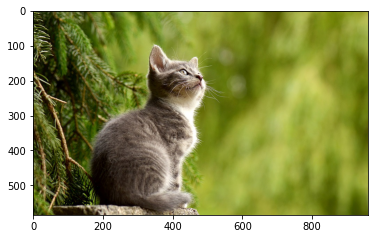

In [ ]:
import matplotlib.pyplot as plt

cat = plt.imread('cat.jpg')
cat = cat.copy()
type(cat)       # Out: numpy.ndarray
cat.shape       # Out: (585, 960, 3)
plt.imshow(cat) # Shows the cat

### Random crop on the cat

In [ ]:
import random
c_size = 400 # smaller than smallest side
i = random.randint(0, cat.shape[0] - c_size)
j = random.randint(0, cat.shape[1] - c_size)
cat_crop = cat[i:i+c_size,j:j+c_size,:]
plt.imshow(cat_crop)

In [ ]:
## Example of broadcasting

cat[i:i+c_size, j-5:j+5] = [255, 0, 0]
cat[i+c_size-5:i+c_size+5, j:j+c_size] = [255, 0, 0]

cat[i:i+c_size, j+c_size-5:j+c_size+5] = [255, 0, 0]
cat[i-5:i+5, j:j+c_size] = [255, 0, 0]

In [ ]:
plt.imshow(cat)

In [ ]:
import cv2
start_point = (j, i)
end_point = (j+c_size, i+c_size)
color = (0, 0, 255) # BGR code
thickness = 2 # in pixels
image = cv2.rectangle(cv2.imread('cat.jpg'), start_point, end_point, color, thickness)

In [ ]:
plt.imshow(image)

### Grayscale the cat

In [ ]:
# luminance formula: Source: https://en.wikipedia.org/wiki/Luma_(video) 
g_weights = np.array([0.3, 0.59, 0.11]) 

g_cat = cat * g_weights    # shape (585, 960, 3)
g_cat = g_cat.sum(axis=2)  # shape (585, 960)

In [ ]:
plt.imshow(g_cat, cmap='gray')

## Pytorch examples

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

MNIST_mean = 0.1307
MNIST_std = 0.3081
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((MNIST_mean,), (MNIST_std,))
    ])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


In [ ]:
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [ ]:
len(trainloader)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img *MNIST_std + MNIST_mean     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('\t  '.join(f'{trainset.classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
from torch.utils.data import Dataset

class MyCatDataset(Dataset):
  def __init__(self):
      super().__init__()
    

In [ ]:
testloader = torch.utils.data.DataLoader(MyCatDataset(), batch_size=batch_size,
                                         shuffle=False, num_workers=2)
next(iter(testloader))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch

        x = self.bn1(F.relu(self.fc1(x)))
        x = self.bn2(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


net = Net().cuda()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, (images, labels) in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = images.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{trainset.classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
outputs = net(images.cuda())
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{trainset.classes[predicted[j]]:5s}'
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.cuda(), labels.cuda()
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')